In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_excel(r"/Users/amalpadhye/Desktop/DS Course Winter Break 2024/Flight_Price_resources/Data_Train.xlsx")

In [4]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.head(9043)['Total_Stops'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9038    False
9039     True
9040    False
9041    False
9042    False
Name: Total_Stops, Length: 9043, dtype: bool

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [12]:
#here, we are just cleaning up our departure and arrival times as well as our journey dates to a more readable form for the algorithm

In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
def changeIntoDatetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ["Dep_Time", "Arrival_Time", "Date_of_Journey"]:
    changeIntoDatetime(feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
data["Journey_day"] = data["Date_of_Journey"].dt.day

In [21]:
data["Journey_month"] = data["Date_of_Journey"].dt.month

In [22]:
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [23]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-15 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-15 05:50:00,2025-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-15 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [24]:
def extract_hour_min(df, col):
    df[col+ "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [25]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-15 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-15 05:50:00,2025-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-15 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [26]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-15 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-15 05:50:00,2025-01-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-15 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [27]:
#now, since we have cleaned up the dep_time and arrival_time features into more readable data, we can drop these columns
cols_to_drop = ["Arrival_Time", "Dep_Time"]

data.drop(cols_to_drop, axis=1, inplace=True)
#axis=1 will drop the entire column on a vertical axis, inplace=True will update the value of the dataframe


In [28]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [29]:
data.shape

(10682, 16)

In [30]:
#now we want to categorize the flights into the time of day when they depart (ex. morning, early morning, night, evening, etc.)

In [31]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [32]:
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

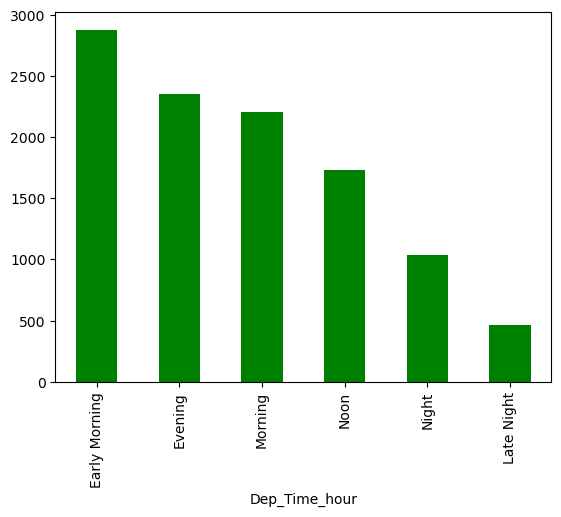

In [33]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar", color="green")

In [34]:
!pip install plotly
!pip install chart_studio

In [35]:
!pip install cufflinks

In [36]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [37]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [38]:
#     ^^This graph shows when most of the flights will take off^^

In [39]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [40]:
data["Duration"] = data["Duration"].apply(preprocess_duration)

In [41]:
data["Duration"][0]

'2h 50m'

In [42]:
'2h 50m'.split(' ')[0]

'2h'

In [43]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [44]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [45]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [46]:
data["Duration_hours"] = data["Duration"].apply(lambda x: int(x.split(' ')[0][0:-1]))
# a lambda function is used when you want to declare a function without a body; in this case, x is a pointer to each row in the "Duration" 
# column, allowing us to get the hour portion of the time


In [47]:
data["Duration_minutes"] = data["Duration"].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [49]:
eval('2*60')

120

In [50]:
data["Duration_total_minute"] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [51]:
#Now that we have a column of integers that stores the number of minutes and another column that holds the price, we can see
#if price correlates with duration

In [52]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_minute'],
      dtype='object')

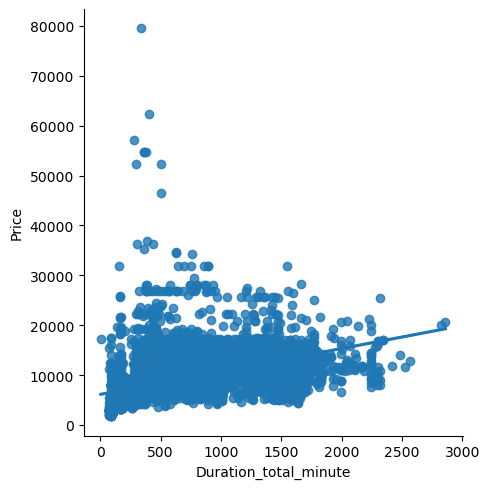

In [53]:
sns.lmplot(x="Duration_total_minute", y="Price", data=data)

In [54]:
#This plot is a linear regression plot showing the relationship between duration and price

<Axes: xlabel='Duration_total_minute', ylabel='Price'>

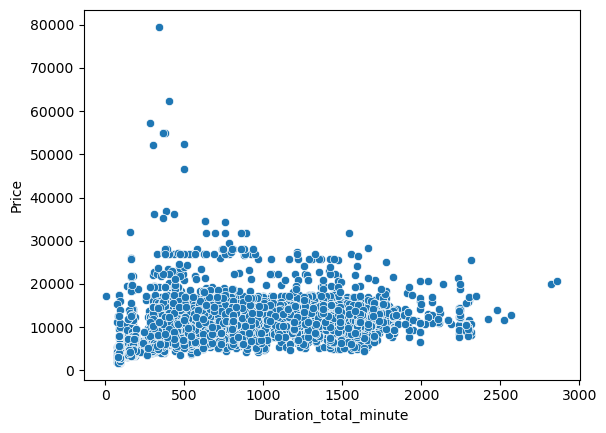

In [55]:
sns.scatterplot(x="Duration_total_minute", y="Price", data=data)

In [56]:
#since this plot includes flights with multiple stops, we should differentiate between flights with multiple stops in them
#the hue parameter of the seaborn scatterplot function allows us to see this

<Axes: xlabel='Duration_total_minute', ylabel='Price'>

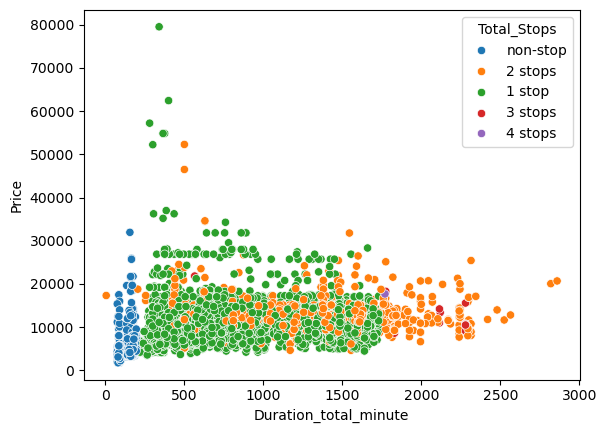

In [57]:
sns.scatterplot(x="Duration_total_minute", y="Price", hue="Total_Stops", data=data)

In [58]:
#now we want to see if the route impacts the price, or
#if the airline impacts the price

In [59]:
data[data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)
#this counts the number of flights per route when the airline is Jet Airways (sorted in descending order)
#the size() function in pandas returns a series, not a dataframe

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

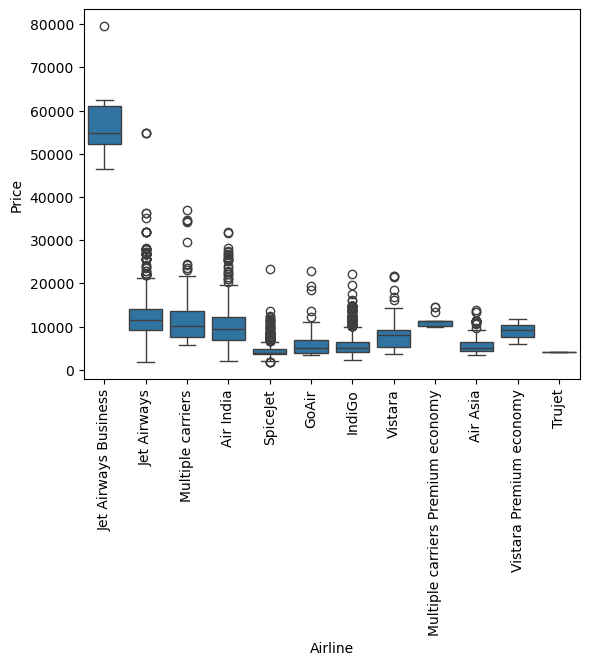

In [60]:
sns.boxplot(y="Price",x="Airline", data=data.sort_values("Price", ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [61]:
# This box and whisker plot shows the prices of flights based on the airline

In [62]:
#now, we do some feature engineering, applying the one-hot technique on our data

In [63]:
#one-hot is a type of feature encoding technique

In [64]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [65]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [66]:
# These 2 lines of code above create lists of all the columns that are of the object type (for the top line) and the columns that are of the 
# non-object type (for the bottom line)

In [67]:
data["Source"].unique()
#gives us an array of all the unique values held in the "Source" column of data

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
data["Source"].apply(lambda x: 1 if x=="Banglore" else 0)
#applies one-hot encoding for all of the rows in data with the specification of "Source"=="banglore"

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [69]:
#we can expand the logic of the previous two lines of code by using a for loop to go through each unique sub_category in "Source"
# and create one-hot encoding for each of the unique sub_categories

In [70]:
for sub_category in data["Source"].unique():
    data["Source_" + sub_category] = data["Source"].apply(lambda x: 1 if x==sub_category else 0)

In [71]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [72]:
airlines = data.groupby(["Airline"])["Price"].mean().sort_values().index

In [73]:
dict_airline = {airline:index for index, airline in enumerate(airlines)}   

In [74]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [75]:
data["Airline"] = data["Airline"].map(dict_airline)

In [76]:
data["Airline"]

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [77]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [78]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [79]:
# Dehli and New Dehli are basically the same, so we can standardize these destinations
data["Destination"].replace("New Delhi", "Delhi", inplace=True)

#if you do not specify inplace=True, the operation will be carried out without actually updating data["Destination"], which is not what we want

In [80]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [81]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values().index

In [82]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [83]:
dict_dest = {dest: index for index, dest in enumerate(dest)}

In [84]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [85]:
data["Destination"] = data["Destination"].map(dict_dest)

In [86]:
data["Destination"]

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [87]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [88]:
# Now we want to implement manual encoding on the data

In [89]:
data["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [90]:
data["Total_Stops"].unique()
# This data is ordinal, so we can implement label encoding on it

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [91]:
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [92]:
data["Total_Stops"] = data["Total_Stops"].map(stop)

In [93]:
data["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [94]:
data["Additional_Info"].value_counts()/len(data) * 100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [95]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [96]:
# We now have a bunch of extraneous columns due to all of the encoding, so we can get rid of those now

In [97]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [98]:
data["Journey_year"].unique() #here we only have one unique journey year, so we can eliminate this column since all flights take place during the same year

array([2019], dtype=int32)

In [99]:
data.drop(columns=["Date_of_Journey","Additional_Info", "Duration_total_minute", "Source", "Journey_year"], axis=1, inplace=True)

In [100]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [101]:
data.drop(columns=["Route"], axis=1, inplace=True)

In [102]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [103]:
data.drop(columns="Duration", axis=1, inplace=True)

In [104]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [105]:
# Now, we can deal with outliers in our data
# For this, we first need to detect outliers
# Outliers can be easily detected with a box plot, a histogram, or a distribution

In [106]:
def plot(df,col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient="h")
    sns.distplot(df[col], ax=ax3, kde=False)

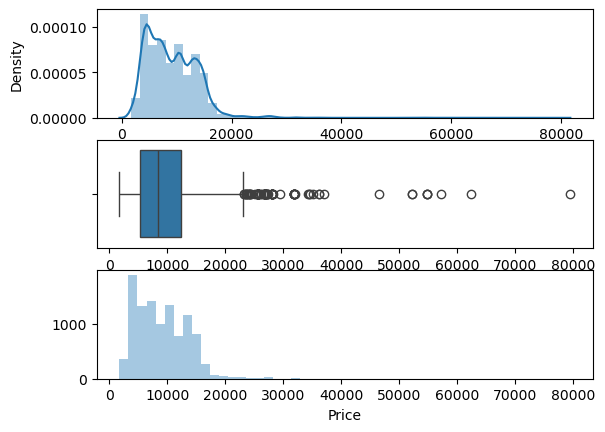

In [107]:
plot(data, "Price")

In [108]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [109]:
print(maximum)

23017.0


In [110]:
print(minimum)

-5367.0


In [111]:
[price for price in data["Price"] if price > maximum or price < minimum]

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26743,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 26890,
 25735,
 54826,
 26890,
 35185,
 79512,
 28097,
 27992,
 26890,
 25735,
 26092,
 31825,
 25913,
 25735,
 27992,
 31825,
 23267,
 62427,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 31825,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 27992,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 26890,
 23528,
 31825,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 57209,
 26890,
 31825,
 26480]

In [112]:
len([price for price in data["Price"] if price > maximum or price < minimum])

94

In [113]:
# This is the number of outliers ^^

In [114]:
data["Price"] = np.where(data["Price"]>=35000, data["Price"].median(), data["Price"])

In [115]:
# Our domain expert has told us to get rid of any values over 35000, rather than getting rid of outliers
# To do this, we do not actually delete the data points, but rather reset these prices to the median

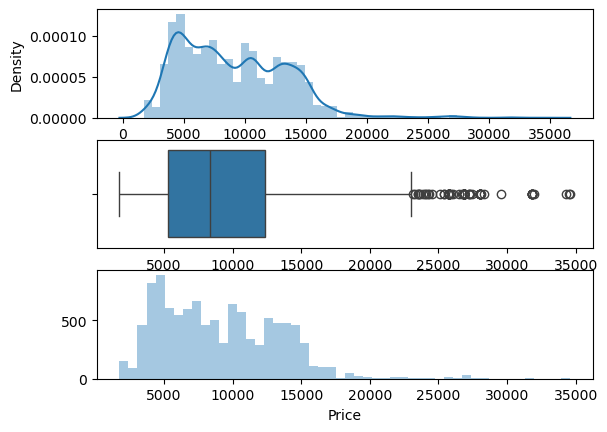

In [116]:
plot(data, "Price")

In [117]:
# Now that our dataframe has been cleaned up and we have all the necessary data for the ML algorithm, we can perform feature selection

In [118]:
X = data.drop(["Price"], axis=1)
# This creates a dataframe (stored as X) that includes all of the columns in data without the price column (since that is our target feature)

In [119]:
y= data["Price"]
# Price is our target feature, since we are trying to predict the price of a flight with the ML model

In [120]:
from sklearn.feature_selection import mutual_info_regression

In [121]:
imp = mutual_info_regression(X, y)

In [122]:
imp

array([1.32326115, 1.0563355 , 0.79164251, 0.37372861, 0.63322064,
       0.92305198, 0.75926239, 1.14395478, 0.90191675, 1.12368697,
       0.68680609, 0.38804368, 0.45265941, 0.52015633, 0.13189735,
       0.19172772])

In [123]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [124]:
imp_df.columns = ["importance"]

In [125]:
imp_df

,importance
Airline,1.323261
Destination,1.056335
Total_Stops,0.791643
Journey_day,0.373729
Journey_month,0.633221
Dep_Time_hour,0.923052
Dep_Time_minute,0.759262
Arrival_Time_hour,1.143955
Arrival_Time_minute,0.901917
Duration_hours,1.123687


In [126]:
imp_df.sort_values(by="importance", ascending=False)

,importance
Airline,1.323261
Arrival_Time_hour,1.143955
Duration_hours,1.123687
Destination,1.056335
Dep_Time_hour,0.923052
Arrival_Time_minute,0.901917
Total_Stops,0.791643
Dep_Time_minute,0.759262
Duration_minutes,0.686806
Journey_month,0.633221


In [127]:
# Since we have such few features and none of the features have an importance that is super close to 0, we will not drop any of the features

In [128]:
# Now we begin building the model

In [129]:
from sklearn.model_selection import train_test_split 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
ml_model = RandomForestRegressor()

In [134]:
ml_model.fit(X_train, y_train)
# This is the line of code that actually trains the ml model, allowing it to "learn" connections between the X_train (independent)
#  and y_train (dependent) features

RandomForestRegressor()

In [135]:
# Now that we have trained the model, we want to test it. We will do this by using our model to predict prices based on the X_test dataset

In [136]:
y_pred = ml_model.predict(X_test)

In [137]:
y_pred

array([16830.62,  5316.18,  8820.08, ...,  3535.28,  6333.67,  6822.53])

In [138]:
from sklearn import metrics

In [140]:
metrics.r2_score(y_test, y_pred)
# this line of code will rate the accuracy of the predicted prices against the actual dataset prices

0.8128051356601785

In [141]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [142]:
import pickle

In [143]:
#file = open(r"/Users/amalpadhye/Desktop/DS Course Winter Break 2024/Flight_Price_resources/rf_random.pkl", "wb")
# This creates a file in which we will store the ML model

In [144]:
#pickle.dump(ml_model, file)
# This saves the current ML model as a file in our computer

In [146]:
model = open(r"/Users/amalpadhye/Desktop/DS Course Winter Break 2024/Flight_Price_resources/rf_random.pkl", "rb")

In [147]:
forest = pickle.load(model)

In [148]:
y_pred2 = forest.predict(X_test)
# Check the output of this code against the previous prediction of the model (y_pred)

In [149]:
metrics.r2_score(y_test, y_pred2)

0.8110500208040393

In [150]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

In [151]:
mape(y_test, y_pred)

13.132804546236057

In [397]:
from sklearn import metrics

In [403]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training score : {}".format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print("predictions are: {}".format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("r2 score : {}".format(r2_score))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_prediction)))
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print("RMSE : {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print("MAPE : {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)


Training score : 0.9518740864168073
predictions are: [16905.45  5303.13  8797.7  ...  3530.54  6277.06  6878.21]


r2 score : 0.8112755415122405
MAE : 1175.2098480818236
MSE : 3674012.2049147915
RMSE : 1916.771296976974
MAPE : 13.164333446753668


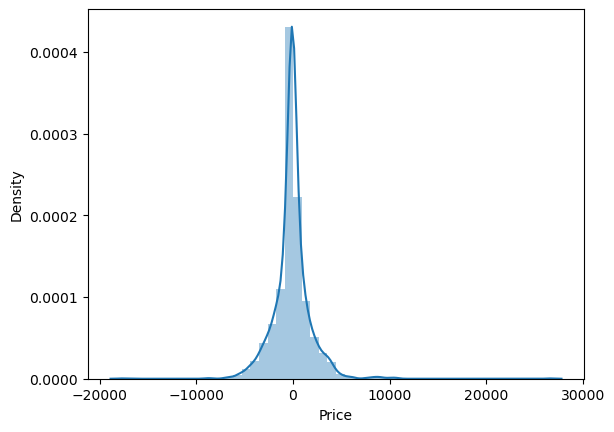

In [405]:
predict(RandomForestRegressor())

In [409]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are: [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6807436923362242
MAE : 1411.1769998752027
MSE : 6215153.9882617835
RMSE : 2493.0210565219427
MAPE : 15.587115853073941


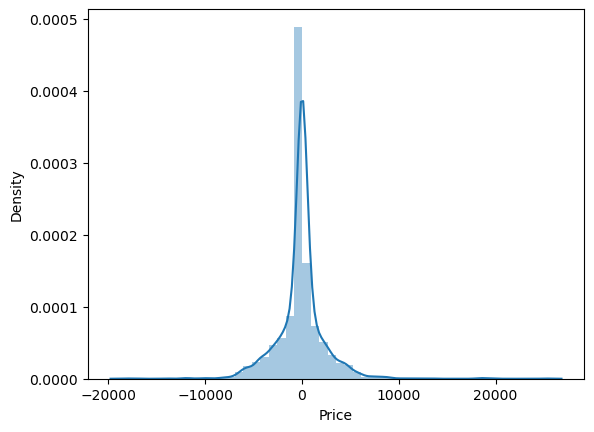

In [411]:
predict(DecisionTreeRegressor())